In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # cancer data
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report #confusion matrix + accuracy calculation
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV #log reg for loss calculation
from sklearn.model_selection import train_test_split # split into test and validation
from sklearn.preprocessing import StandardScaler #standardization
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns




db = pd.read_csv("diabetes.csv") # dataframe, 9 features, 9th feature is output
cancer = load_breast_cancer() # insta numpy, 32 features, 1st is id, 2nd is result (M(malignant) or B(Benign))
#print(type(cancer))
bc_in = cancer.data #numpy array of features, not output nor id
bc_out = cancer.target #numpy array of targets, 

db.shape



(768, 9)

In [2]:
# problem 1
#Normalization

db_in = db[db.columns.drop("Outcome")].values
db_out = db['Outcome'].values
db_out.reshape(-1,1)
print(db_out.shape)
x0 = np.ones((len(db_in),1))
db_in = np.hstack((x0,db_in))
xtrain, xtest, ytrain, ytest = train_test_split(db_in,db_out,test_size = 0.2,random_state = 0,shuffle = True)

xntrain = sklearn.preprocessing.normalize(xtrain,norm='max',axis = 0) # normalize(min_max) diabetes xtrain set per column

xntest = sklearn.preprocessing.normalize(xtest,norm='max',axis = 0) # normalize(min_max) diabetes xtest set per column



#Standardization
std = StandardScaler()

xstrain = std.fit_transform(xtrain)
xstest = std.transform(xtest)

(768,)


Diabetes Standardization
Accuracy:  0.8246753246753247
Precision:  0.7631578947368421
Recall:  0.6170212765957447


Diabetes Normalization
Accuracy:  0.7012987012987013
Precision:  0.5061728395061729
Recall:  0.8723404255319149




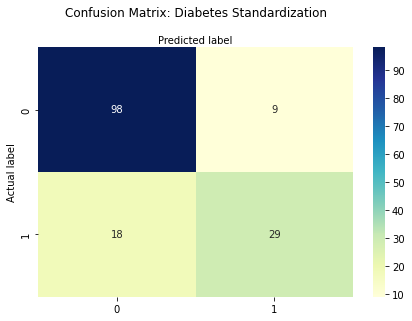

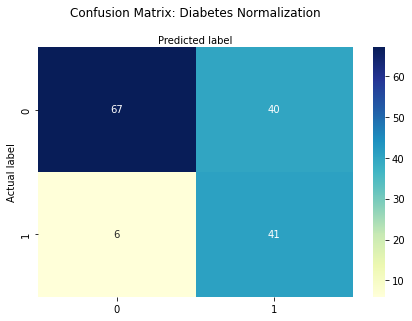

In [3]:
# Problem 1 training

def Log_Reg(xtr,ytr,xte,yte,k,title,weight_penalty):
    
    if(k>0):
        model =LogisticRegressionCV(penalty = weight_penalty,random_state = 0,solver = 'liblinear',cv = k,max_iter=1000) #set model = to Logistic regression
    elif(k==0):
        model = LogisticRegression(penalty = weight_penalty,random_state = 0,max_iter=1000) #set model = to Logistic regression
    model.fit(xtr,ytr) # train model on xtr and ytr
    y_pred = model.predict(xte) # command for including validation into training
    
    print(title)
    print("Accuracy: ",accuracy_score(yte,y_pred))
    print("Precision: ",precision_score(yte,y_pred))
    print("Recall: ",recall_score(yte,y_pred))
    print('\n')
    #CONFUSION MATRIX PORTION
    confusion = confusion_matrix(yte,y_pred)
    class_names=["true","false"] # name  of classes 
    fig, ax = plt.subplots() 
    tick_marks = np.arange(len(class_names)) 
    plt.xticks(tick_marks, class_names) 
    plt.yticks(tick_marks, class_names)
    
    # create heatmap 
    sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g') 
    ax.xaxis.set_label_position("top") 
    plt.tight_layout()
    title = "Confusion Matrix: " + title
    plt.title(title, y=1.1) 
    plt.ylabel('Actual label') 
    plt.xlabel('Predicted label') 
    
    return y_pred
result = Log_Reg(xstrain,ytrain,xstest,ytest,0,"Diabetes Standardization",'none')
result =Log_Reg(xntrain,ytrain,xntest,ytest,0,"Diabetes Normalization",'none')



Diabetes Standardization k=5
Accuracy:  0.8246753246753247
Precision:  0.7631578947368421
Recall:  0.6170212765957447


Diabetes Standardization k=10
Accuracy:  0.7662337662337663
Precision:  0.6222222222222222
Recall:  0.5957446808510638


Diabetes Normalization k=5
Accuracy:  0.7012987012987013
Precision:  0.5061728395061729
Recall:  0.8723404255319149


Diabetes Normalization k=10
Accuracy:  0.7012987012987013
Precision:  0.5061728395061729
Recall:  0.8723404255319149




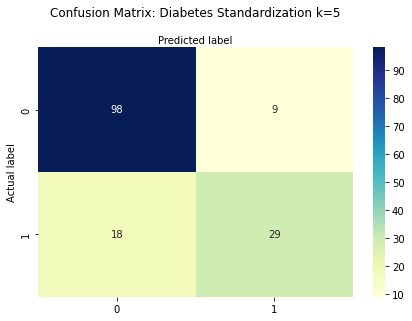

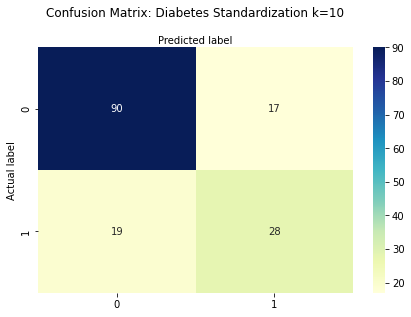

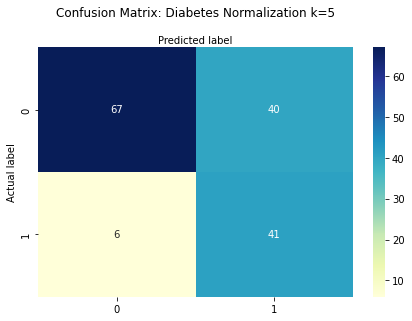

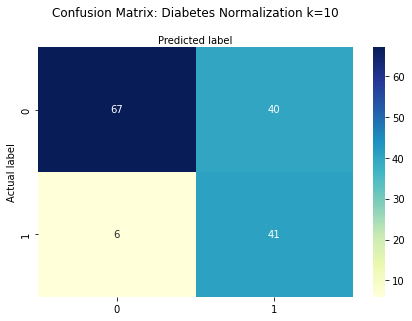

In [4]:
# problem 2
#Standardization notes: k=5 produces same results, k=10 produces worse results
result = Log_Reg(xstrain,ytrain,xstest,ytest,5,"Diabetes Standardization k=5",'l2') 
result = Log_Reg(xstrain,ytrain,xstest,ytest,10,"Diabetes Standardization k=10",'l2')

#Normalization notes: while k=5 and k=10 are the same, they are both worse than the problem 1 variant
result = Log_Reg(xntrain,ytrain,xntest,ytest,5,"Diabetes Normalization k=5",'l2')
result = Log_Reg(xntrain,ytrain,xntest,ytest,10,"Diabetes Normalization k=10",'l2')

Standardization: cancer data no penalty
Accuracy:  0.956140350877193
Precision:  0.9696969696969697
Recall:  0.9552238805970149


Normalization: cancer data no penalty
Accuracy:  0.5526315789473685
Precision:  0.9444444444444444
Recall:  0.2537313432835821


Standardization: cancer data L2 penalty
Accuracy:  0.9649122807017544
Precision:  0.9701492537313433
Recall:  0.9701492537313433


Normalization: cancer data L2 penalty
Accuracy:  0.8771929824561403
Precision:  1.0
Recall:  0.7910447761194029




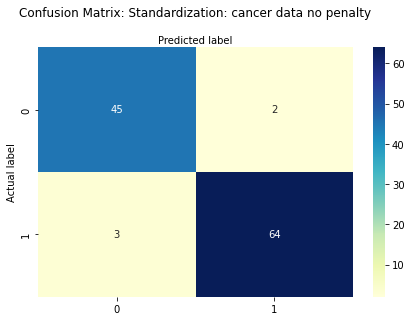

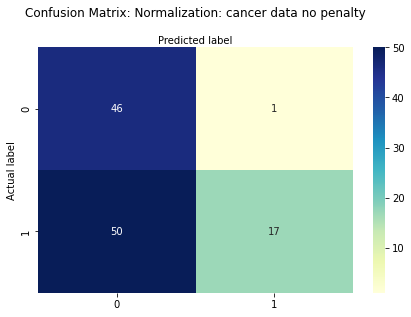

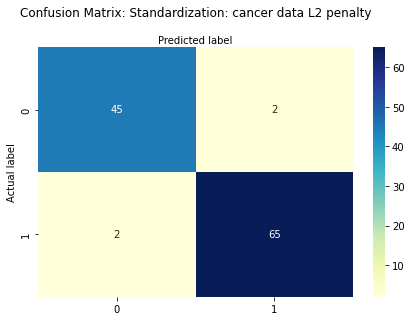

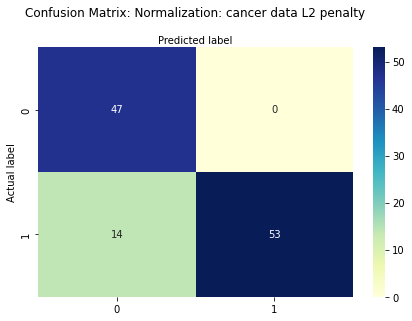

In [5]:
#problem 3
#bc_in.shape
#bc_out.shape
np.reshape(bc_out,(-1,1))
x0 = np.ones((len(bc_in),1))
bc_in = np.hstack((x0,bc_in))
xtrain, xtest, ytrain, ytest = train_test_split(bc_in,bc_out,test_size = 0.2,random_state = 0,shuffle = True)

xntrain = sklearn.preprocessing.normalize(xtrain,norm='max',axis = 0) # normalize(min_max) diabetes xtrain set per column

xntest = sklearn.preprocessing.normalize(xtest,norm='max',axis = 0) # normalize(min_max) diabetes xtest set per column

#Standardization
std = StandardScaler()

xstrain = std.fit_transform(xtrain)
xstest = std.transform(xtest)

# Training and results
result =Log_Reg(xstrain,ytrain,xstest,ytest,0,"Standardization: cancer data no penalty",'none')
result =Log_Reg(xntrain,ytrain,xntest,ytest,0,"Normalization: cancer data no penalty",'none')

result =Log_Reg(xstrain,ytrain,xstest,ytest,0,"Standardization: cancer data L2 penalty",'l2')
result =Log_Reg(xntrain,ytrain,xntest,ytest,0,"Normalization: cancer data L2 penalty",'l2')




Standardization: cancer data default penalty, k=5
Accuracy:  0.9649122807017544
Precision:  0.9701492537313433
Recall:  0.9701492537313433


Normalization: cancer data default penalty, k=10
Accuracy:  0.7982456140350878
Precision:  1.0
Recall:  0.6567164179104478


Standardization: cancer data l1 penalty, k=5
Accuracy:  0.956140350877193
Precision:  0.9558823529411765
Recall:  0.9701492537313433


Normalization: cancer data l1 penalty, k=10
Accuracy:  0.7807017543859649
Precision:  1.0
Recall:  0.6268656716417911




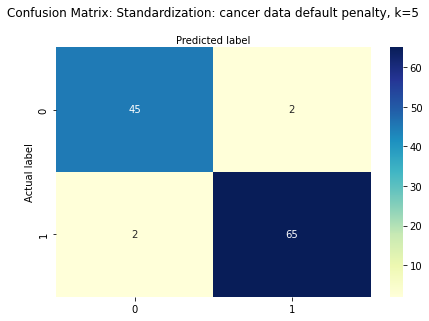

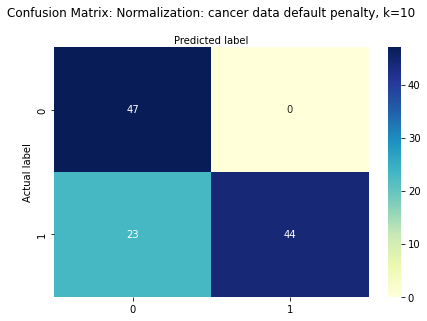

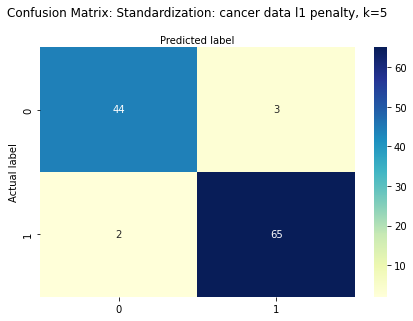

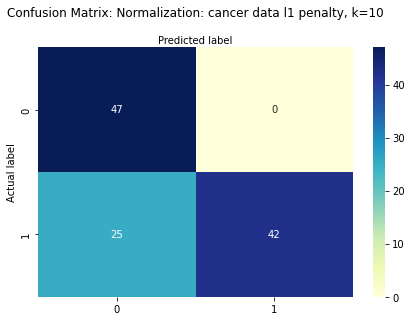

In [6]:
#Problem 4
result =Log_Reg(xstrain,ytrain,xstest,ytest,5,"Standardization: cancer data default penalty, k=5",'l2')
result =Log_Reg(xntrain,ytrain,xntest,ytest,10,"Normalization: cancer data default penalty, k=10",'l2')

result =Log_Reg(xstrain,ytrain,xstest,ytest,5,"Standardization: cancer data l1 penalty, k=5",'l1')
result =Log_Reg(xntrain,ytrain,xntest,ytest,10,"Normalization: cancer data l1 penalty, k=10",'l1')